In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import glob
import os
import numpy as np
import matplotlib.tri as mtri
import matplotlib.colors as mcolors
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# VeReMii Creation Paper pg15 for attackerType Explinations

In [ ]:
csvs_scen = glob.glob(r'C:\Users\aidan\Desktop\5G-BSM-Threat-Detection\Model1Preds\*.csv')
df_scen = []

for c in csvs_scen:
    df = pd.read_csv(c)
    df_scen.append(df)
print(len(df_scen))
df_scen[0]

In [63]:
for df in df_scen:
    scaler = StandardScaler()
    df[['pos0', 'pos1']] = scaler.fit_transform(df[['pos0', 'pos1']])
    df[['spd0', 'spd1']] = scaler.fit_transform(df[['spd0', 'spd1']])
df_scen[2][0:100]

,Unnamed: 0,time,sender,attackerType,pos0,pos1,spd0,spd1,pos0Close0,pos1Close0,spd0Close0,spd1Close0,pos0Close1,pos1Close1,spd0Close1,spd1Close1
0,0,10800.079645,19,0,-0.473579,-0.197564,0.189765,-1.276816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,10800.148565,37,0,-0.463494,-0.562106,0.300362,-1.029182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,10800.204649,7,0,-0.506209,1.353337,-0.122428,1.206885,3613.826325,5505.799698,3.095704,-36.770480,3621.493857,5409.145179,3.683949,-29.743390
3,3,10800.323541,67,0,-0.199034,-1.098010,-0.266171,0.001075,3621.493857,5409.145179,3.683949,-29.743390,3613.826325,5505.799698,3.095704,-36.770480
4,4,10800.426023,61,0,-0.504186,1.761661,0.324374,1.289303,3589.017816,5917.005804,1.435204,33.709079,3613.826325,5505.799698,3.095704,-36.770480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,10810.742820,79,0,-0.501041,1.394075,-0.732782,-1.209888,3593.862577,5942.690928,-2.289323,-34.487105,3589.017816,5917.005804,1.435204,33.709079
96,96,10810.948090,49,0,-0.427428,-1.371797,0.483484,-1.023630,3647.992370,5200.323807,4.654638,-29.564880,3654.642925,5200.528196,5.034196,-31.979331
97,97,10810.993852,55,0,-0.445519,-0.962218,0.656106,-1.229256,3639.336571,5297.760602,5.189822,-32.967934,3630.264100,5312.928529,4.653697,-29.558905
98,98,10811.026510,73,16,-0.503294,1.189810,-0.396038,-1.196830,3589.017816,5917.005804,1.435204,33.709079,3592.946744,5927.806995,-1.811165,-34.871251


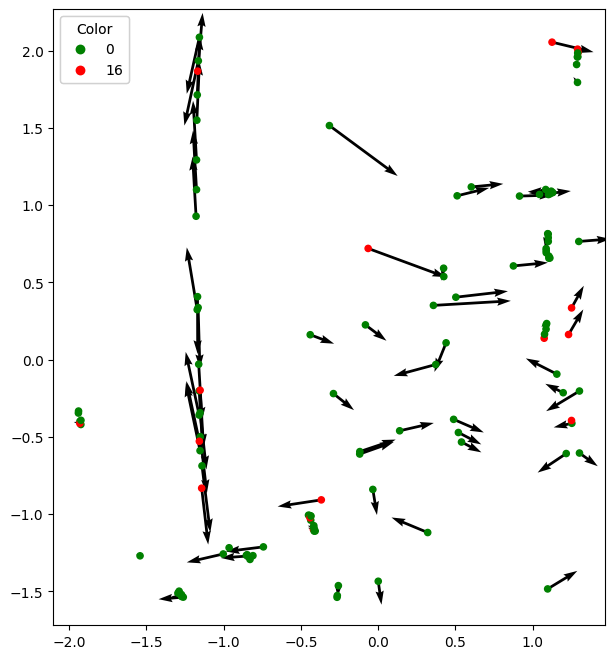

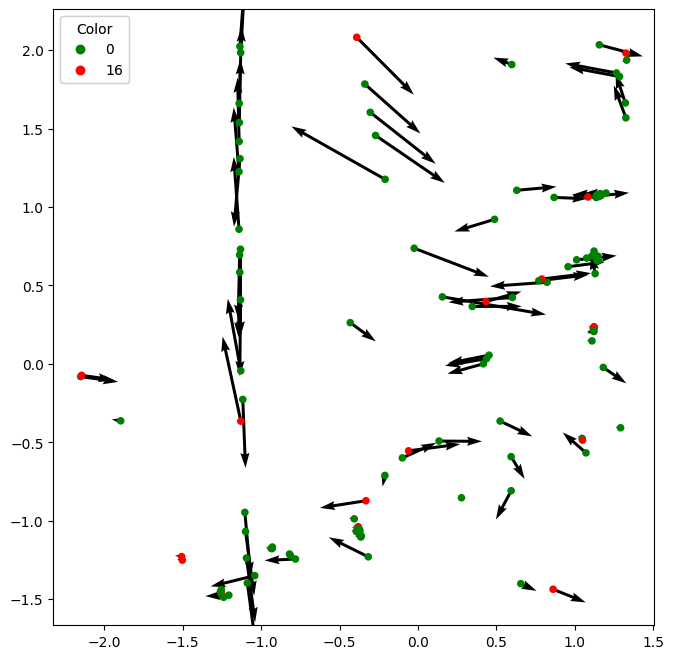

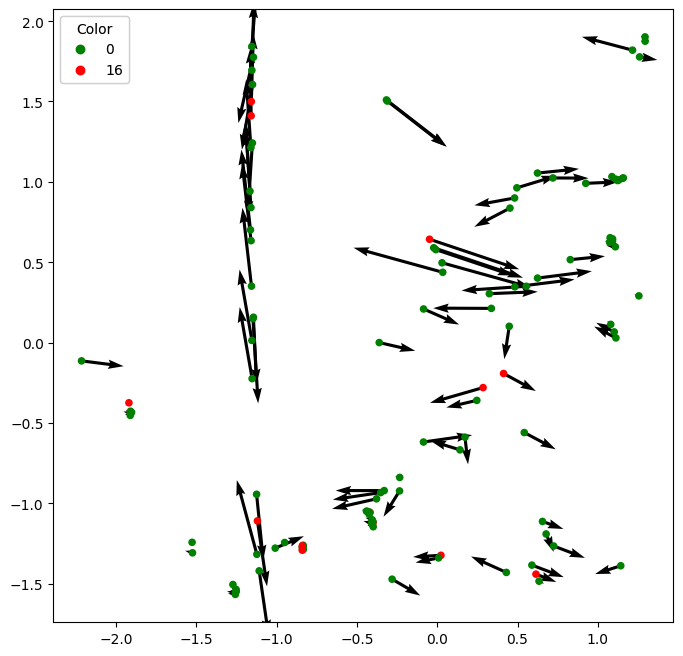

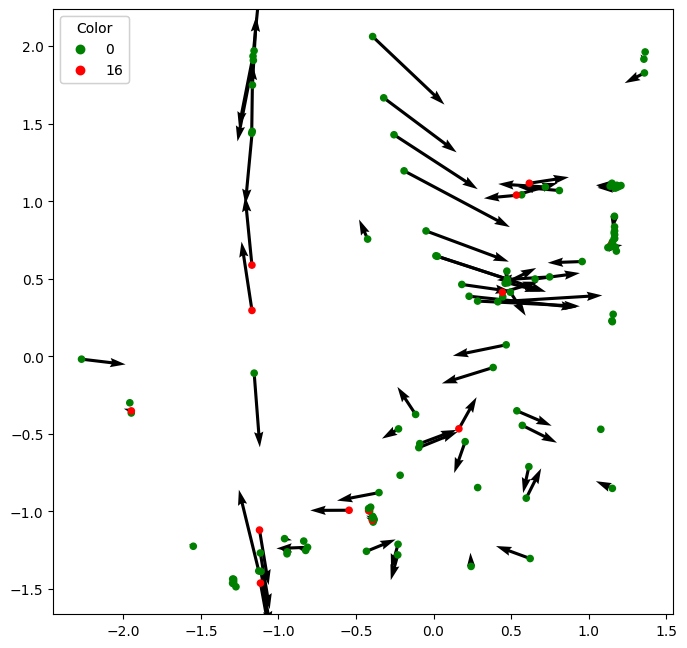

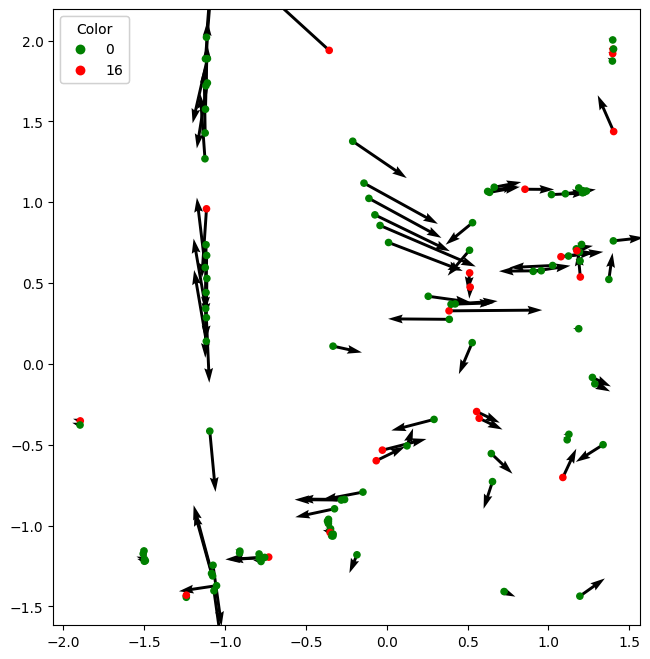

In [64]:
for i in range(30,35):
    df = df_scen[i].copy().loc[0:120] #[210:240]
    cmap = mcolors.ListedColormap(['green', 'red'])
    fig, ax = plt.subplots(figsize=(8,8))
    ax.quiver(df.pos0, df.pos1, df.spd0, df.spd1, scale = 20, width = 0.005)
    scatter = ax.scatter(df.pos0, df.pos1, c=df.attackerType, cmap=cmap, s=20)
    legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="Color")
    ax.add_artist(legend1)
    ax.set_aspect('equal')
    plt.show()

In [87]:
csvs = glob.glob(r'C:\Users\aidan\Desktop\5G-BSM-Threat-Detection\Model2SeperateAttackType\8\*.csv')
df_list = []

for c in csvs:
    df = pd.read_csv(c)
    for i in np.unique(df.sender):
        df_list.append(df[df.sender.isin([i])].copy())
    #     df[df.ID.isin([subs[0]])&df.Vigil.isin(vigils[0])].copy()
print(len(df_list))


df_attacker = []
df_normal = []

df = df_list[0:200]
for j in df:
#     print(j)
    if j.attackerType.any() == 0:
        df_temp = j.fillna(0)#4

        scaler = StandardScaler()
        df_temp[['pos0', 'pos1']] = scaler.fit_transform(df_temp[['pos0', 'pos1']])
        df_temp[['spd0', 'spd1']] = scaler.fit_transform(df_temp[['spd0', 'spd1']])
        df_temp[['pos0Close0', 'pos1Close0']] = scaler.fit_transform(df_temp[['pos0Close0', 'pos1Close0']])
        df_temp[['spd0Close0', 'spd1Close0']] = scaler.fit_transform(df_temp[['spd0Close0', 'spd1Close0']])
        df_temp[['pos0Close1', 'pos1Close1']] = scaler.fit_transform(df_temp[['pos0Close1', 'pos1Close1']])
        df_temp[['spd0Close1', 'spd1Close1']] = scaler.fit_transform(df_temp[['spd0Close1', 'spd1Close1']])

        df_normal.append(df_temp)

    
    elif j.attackerType.any() == 1:
        df_temp = j.fillna(0)#4

        scaler = StandardScaler()
        df_temp[['pos0', 'pos1']] = scaler.fit_transform(df_temp[['pos0', 'pos1']])
        df_temp[['spd0', 'spd1']] = scaler.fit_transform(df_temp[['spd0', 'spd1']])
        df_temp[['pos0Close0', 'pos1Close0']] = scaler.fit_transform(df_temp[['pos0Close0', 'pos1Close0']])
        df_temp[['spd0Close0', 'spd1Close0']] = scaler.fit_transform(df_temp[['spd0Close0', 'spd1Close0']])
        df_temp[['pos0Close1', 'pos1Close1']] = scaler.fit_transform(df_temp[['pos0Close1', 'pos1Close1']])
        df_temp[['spd0Close1', 'spd1Close1']] = scaler.fit_transform(df_temp[['spd0Close1', 'spd1Close1']])

        df_attacker.append(df_temp)
        

9533


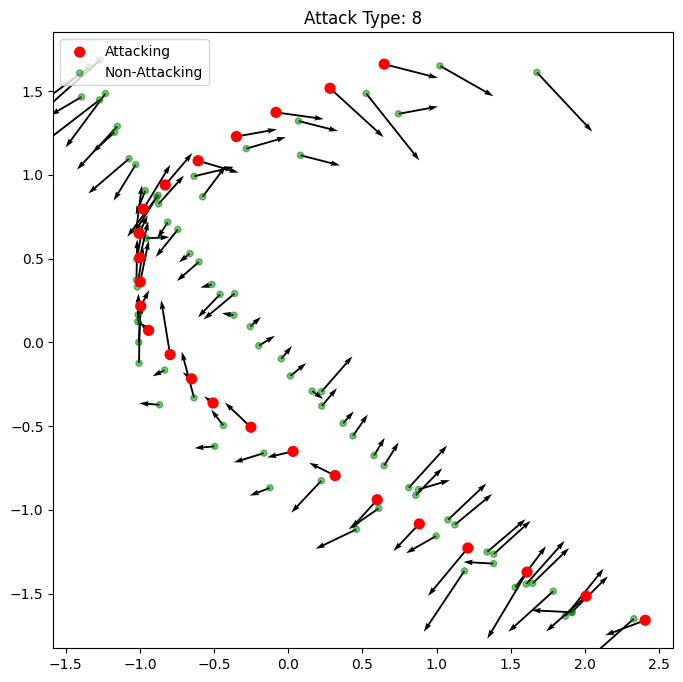

In [93]:


#     df = pd.read_csv(r'C:\Users\aidan\Desktop\5G-BSM-Threat-Detection\Model1Preds\Pred_Car_35154_attacker.csv') # Pred_Car_35154_attacker
df = df_attacker[14]

# df = df.loc[0:120] #[210:240]
cmap = mcolors.ListedColormap(['green', 'red'])
fig, ax = plt.subplots(figsize=(8,8))

for i in range(0,5):
    df2 = df_normal[i]
    ax.quiver(df2.pos0, df2.pos1, df2.spd0, df2.spd1, scale = 20, width = 0.003)
    scatter2 = ax.scatter(df2.pos0, df2.pos1, c=df2.attackerType, cmap=mcolors.ListedColormap(['green']), s=20, alpha=0.5)
    # ax.quiver(df.pos0_Pred, df.pos1_Pred, df.spd0_Pred, df.spd1_Pred, scale = 20, width = 0.003)
    # scatter2 = ax.scatter(df.pos0_Pred, df.pos1_Pred, c=df.attackerType, cmap=mcolors.ListedColormap(['blue']), s=20)

ax.quiver(df.pos0, df.pos1, df.spd0, df.spd1, scale = 20, width = 0.003)
scatter1 = ax.scatter(df.pos0, df.pos1, c=df.attackerType, cmap=mcolors.ListedColormap(['red']), s=50)

plt.legend((scatter1, scatter2),
           ('Attacking', 'Non-Attacking'),
           loc='upper left',
           fontsize=10)
plt.title('Attack Type: 8')
plt.show()
